# 6.4 Health Care Insurance Case Study - Predicting Medical Appointment No-show Patients
***

#### https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Medical appointment no-shows is a large problem in healthcare as approximately 1 in 5 patients will miss their appointment ([Source](https://www.solutionreach.com/blog/which-wins-the-national-average-no-show-rate-or-yours)). This is an issue for everyone involved: 

1) the scheduled patient presumably needs to be seen otherwise they wouldn’t have had an appointment

2) other patients would have liked to have that spot but couldn’t

3) healthcare providers must spend extra time to contact and re-schedule the patient as well as wasted any time they used to prepare for the visit.

**No-shows Definition**: Given the dates and times of scheduling day and appointment day, predict if a patient will miss their medical appointment.

**No-shows Dataset**: the medical appointment no-show hosted on Kaggle [No-shows Data](https://www.kaggle.com/joniarroba/noshowappointments).

## The Contents with step-by-step coding - 3:

### 1. Exploratory Data Analysis (Data Review, Data Visualization, Data Cleaning, etc.)
### 2. Feature Engineering
### 3. Feature Selection (Variable Importance Ranking) - for data sets with many features
### 4. Data PreProcessing
### 5. Training and Evaluating the Logistic Regression Classification model on the Training set
### 6. Training and Evaluating the Decision Tree Classification model on the Training set
### 7. Training and Evaluating the Random Forest Classification model on the Training set
### 8. Model Comparison and Model Selection


### Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.
How to select features and what are Benefits of performing feature selection before modeling your data?

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

- Improves Accuracy: Less misleading data means modeling accuracy improves.

- Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

### Introduction to Three Feature Selection Methods: they are easy to use and also gives good results.
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
# Set up a path to data folder
import os
os.chdir(r'C:\Users\yumei\CSP Workshop 2023\Data')
os.getcwd()

'C:\\Users\\yumei\\CSP Workshop 2023\\Data'

In [10]:
# Import Data
dfcopy = pd.read_csv(r'C:\Users\yumei\CSP Workshop 2023\Data\dfcopy.csv')
dfcopy.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,...,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_dayofweek,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_dayofweek,Sche_Appt_days
0,3469431281946,5649465,0,0,REDENÇÃO,0,0,0,0,0,...,18,3,6,1,5,19,9,23,0,6.710
1,48826747693,5659726,0,0,MARUÍPE,0,0,0,0,0,...,18,4,14,2,6,22,1,23,2,28.392
2,9726846148373,5749887,0,0,MARUÍPE,0,0,0,0,0,...,22,31,8,1,6,22,1,23,2,1.653
3,28452896784213,5664173,1,0,SÃO CRISTÓVÃO,0,0,0,0,0,...,18,5,11,3,6,23,8,23,2,34.525
4,726999492642124,5650471,0,0,SANTOS DUMONT,0,0,0,0,0,...,18,3,7,1,5,18,3,23,1,0.676


In [11]:
# Check missing data again
dfcopy.isnull().sum()

PatientId                   0
AppointmentID               0
Gender                      0
Age                         0
Neighbourhood               0
Scholarship                 0
Hipertension                0
Diabetes                    0
Alcoholism                  0
Handicap                    0
SMS_received                0
TargetNoshow                0
ScheduledDay_month          0
ScheduledDay_week           0
ScheduledDay_day            0
ScheduledDay_hour           0
ScheduledDay_dayofweek      0
AppointmentDay_month        0
AppointmentDay_week         0
AppointmentDay_day          0
AppointmentDay_hour         0
AppointmentDay_dayofweek    0
Sche_Appt_days              0
dtype: int64

<AxesSubplot:>

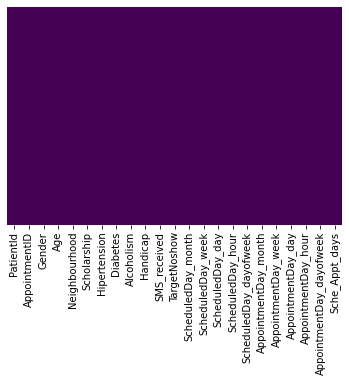

In [12]:
# Use heatmap to check missing data
sbn.heatmap(dfcopy.isnull(), yticklabels=False, cbar=False,cmap='viridis')

## Feature Selection
### 1. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The `scikit-learn` library provides the `SelectKBest` class that can be used with a suite of different statistical tests to select a specific number of features. We will use the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features

In [13]:
dfcopy.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'TargetNoshow', 'ScheduledDay_month',
       'ScheduledDay_week', 'ScheduledDay_day', 'ScheduledDay_hour',
       'ScheduledDay_dayofweek', 'AppointmentDay_month', 'AppointmentDay_week',
       'AppointmentDay_day', 'AppointmentDay_hour', 'AppointmentDay_dayofweek',
       'Sche_Appt_days'],
      dtype='object')

In [16]:
X = dfcopy[['Age','Scholarship','Hipertension','Diabetes','Alcoholism',
            'Handicap', 'SMS_received','Gender','ScheduledDay_month', 'ScheduledDay_week','ScheduledDay_day',
            'ScheduledDay_hour', 'ScheduledDay_dayofweek','AppointmentDay_month','AppointmentDay_week','AppointmentDay_day',
            'AppointmentDay_hour','AppointmentDay_dayofweek','Sche_Appt_days']]  #independent columns
y = dfcopy['TargetNoshow']  #Target column

In [17]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [18]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature Name','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Feature Name         Score
18      Sche_Appt_days  82843.549930
0                  Age   5790.333146
10    ScheduledDay_day   1470.943651
6         SMS_received   1200.839311
9    ScheduledDay_week   1132.952618
11   ScheduledDay_hour    390.780051
8   ScheduledDay_month    303.890859
2         Hipertension    112.834183
1          Scholarship     84.776016
3             Diabetes     23.567551


### 2. Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an built-in class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.27096214 0.01148661 0.0096521  0.00954611 0.00742078 0.00792608
 0.01665465 0.02886354 0.01561495 0.02703693 0.04446902 0.12404747
 0.03715548 0.00467171 0.01493354 0.03560831 0.         0.03171342
 0.30223717]


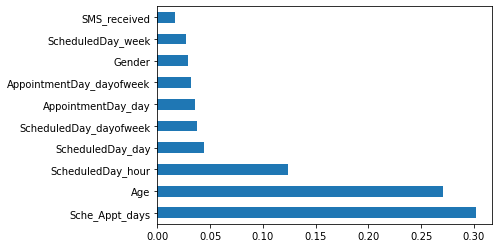

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use built-in class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [20]:
# From variable importance ranking, we use top 10 most important variables to train the models:
# 'Sche_Appt_days', 'Age', 'ScheduledDay_hour', 'ScheduledDay_day', 'ScheduledDay_dayofweek', 'AppointmentDay_day',
# 'AppointmentDay_dayofweek', 'ScheduleDay_week', 'M', 'SMS_received'

[0.26913053 0.01073038 0.01036075 0.00976068 0.00785435 0.0077984
 0.0167491  0.02935437 0.01671832 0.02571921 0.04504352 0.12542858
 0.03793028 0.00455627 0.01480245 0.03538684 0.         0.03130745
 0.30136851]


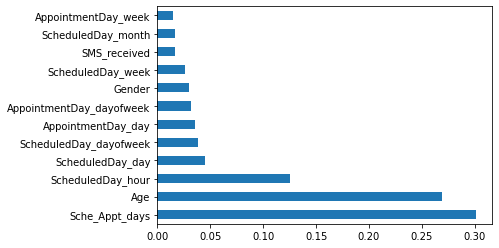

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [22]:
# From variable importance ranking, we use top 12 most important variables to train the models:
# 'Sche_Appt_days', 'Age', 'ScheduledDay_hour', 'ScheduledDay_day', 'ScheduledDay_dayofweek', 'AppointmentDay_day',
# 'AppointmentDay_dayofweek', 'ScheduleDay_week', 'M', 'SMS_received', 'AppointDay_week', 'ScheduledDay_month'

[0.27210305 0.00996257 0.00956517 0.00997486 0.0077327  0.00768159
 0.01622956 0.02942244 0.01672102 0.02687027 0.04417635 0.12530158
 0.03683009 0.00462089 0.01453864 0.03532923 0.         0.0315183
 0.30142168]


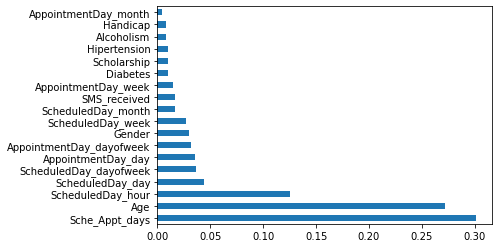

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

### 3.Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable. Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

C:\Users\yumei\AppData\Local\Temp/ipykernel_93436/434851173.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dfcopy.corr()


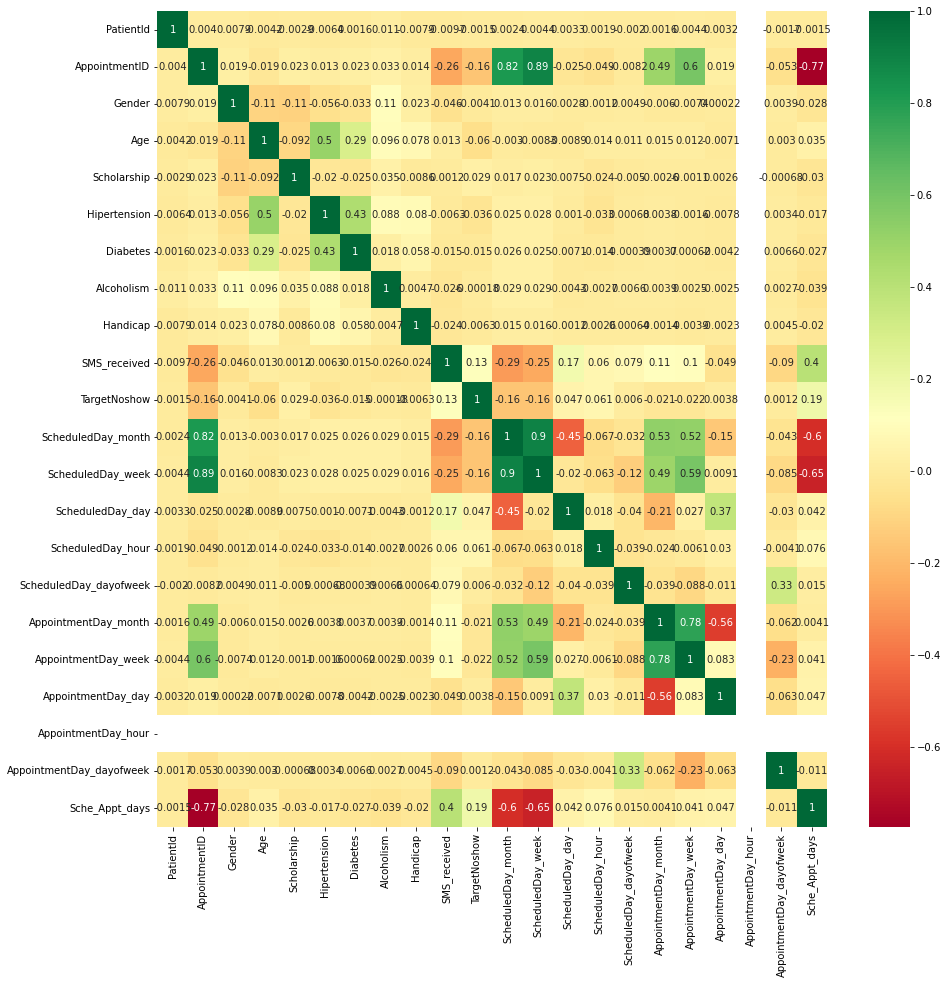

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
#get correlations of each features in dataset
corrmat = dfcopy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(dfcopy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### The course materials are developed mainly based on my personal experience and contributions from the Python learning community. 

Referred Books: 
- Learning Python, 5th Edition by Mark Lutz
- Python Data Science Handbook, Jake, VanderPlas
- Python for Data Analysis, Wes McKinney 

Copyright ©2023 Mei Najim. All rights reserved.  